References:
1. Panduan Lab 3
2. https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
import io
import helper

from scipy import fftpack as fp
from skimage import color
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util

### **1. [50] [45] Terapkan minimal 2 Low Pass dan 2 High Pass Filter terhadap citra building.jpg, gunakan dua nilai D0 yang berbeda pada masing-masing filter!

a. [5] Tampilkan citra tersebut pada domain frekuensi!

In [125]:
img_building = io.imread('Citra Tugas Lab 3/bulding.jpg')
img_building = color.rgba2rgb(img_building)
img_building = color.rgb2gray(img_building)
w, l = helper.paddedsize(img_building.shape[0], img_building.shape[1])

In [126]:
img_building_freq_domain_ft = fp.fft2(img_building)
img_building_freq_domain_ft = fp.ifft2(img_building_freq_domain_ft).real

b. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!

In [127]:
# Menampilkan hasil citra domain frekuensi dengan pemrosesan low pass filter
# freq_domain_filtered = filters.rank.mean(img_building_freq_domain_ft, selem=morphology.square(9))

# plt.figure(figsize=(15,15))
# plt.imshow(freq_domain_filtered, cmap="gray")

In [128]:
# Menampilkan hasil citra domain spasial dengan pemrosesan low pass filter
# img_building_spat_domain_rgb = img_building
# spat_domain_filtered = filters.gaussian(img_building_spat_domain_rgb, sigma=0.05)

# plt.figure(figsize=(15,15))
# plt.imshow(spat_domain_filtered, cmap="gray")

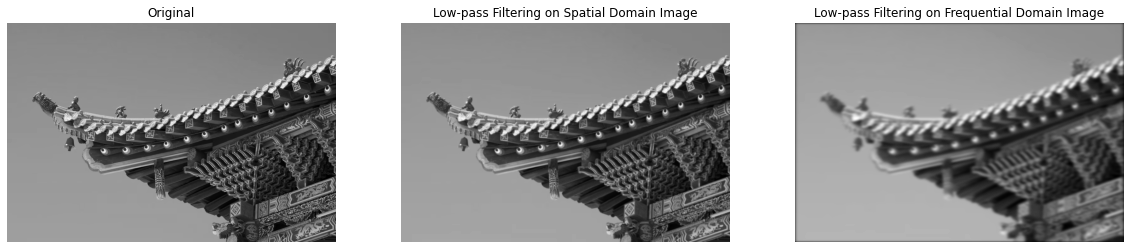

In [129]:
# Load image
w, l = helper.paddedsize(img_building.shape[0], img_building.shape[1])

# Create gaussian lowpass filter
# lpfilter function is provided in helper.py
h = helper.lpfilter('gaussian', w, l, 0.05 * w)

# Calculate DFT
f = fp.fft2(img_building,(w,l))

# Apply lowpass filter on frequential domain
LPFS_building = h * f

# Apply lowpass filter on spatial domain
img_building_spat_domain_rgb = img_building
spat_domain_filtered = filters.gaussian(img_building_spat_domain_rgb, cval=0.05)

# Calculate IDFT for spatial domain transformation
LPF_building = fp.ifft2(LPFS_building).real
LPF_building = LPF_building[:img_building.shape[0],:img_building.shape[1]]

# Shifting for fourier spectrum display
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_building)

# Scaling for fourier spectrum display
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf))

# Show image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1); plt.imshow(img_building, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(1,3,2); plt.imshow(spat_domain_filtered, cmap='gray')
plt.title("Low-pass Filtering on Spatial Domain Image")
plt.axis("off")
plt.subplot(1,3,3); plt.imshow(LPF_building, cmap='gray')
plt.title("Low-pass Filtering on Frequential Domain Image")
plt.axis("off")
plt.show()

c. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!

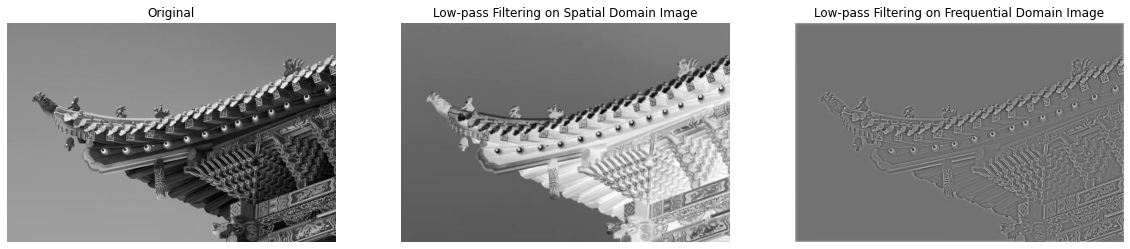

In [130]:
# Create gaussian highpass filter
# hpfilter function is provided in helper.py
h = helper.hpfilter('gaussian', w, l, 0.05 * w)

# Calculate DFT
f = fp.fft2(img_building,(w,l))

# Apply highpass filter
LPFS_building = h*f

# Calculate IDFT for spatial domain transformation
LPF_building = fp.ifft2(LPFS_building).real
LPF_building = LPF_building[:img_building.shape[0],:img_building.shape[1]]

# Shifting for fourier spectrum display
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_building)

# Apply lowpass filter on spatial domain
img_building_spat_domain_rgb = img_building
spat_domain_filtered = 1 - filters.gaussian(img_building_spat_domain_rgb, cval=0.05)

# Scaling for fourier spectrum display
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf))

# Show image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1); plt.imshow(img_building, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(1,3,2); plt.imshow(spat_domain_filtered, cmap='gray')
plt.title("Low-pass Filtering on Spatial Domain Image")
plt.axis("off")
plt.subplot(1,3,3); plt.imshow(LPF_building, cmap='gray')
plt.title("Low-pass Filtering on Frequential Domain Image")
plt.axis("off")
plt.show()

d. [6] Bagaimana pengaruh dari nilai D0 yang anda gunakan pada bagian (b) dan (c)?

Pada low-pass filter, semakin besar nilai D_0, maka citra akan semakin jelas dan smoothnessnya berkurang. Sedangkan pada high pass filter, semakin besar D_0, maka akan semakin berkurang sensitivitas algoritma dalam mendeteksi edge.

### 2. [55] Berikut adalah citra train.jpg yang corrupted sehingga menimbulkan pattern noise.

a. [5] Tampilkan citra tersebut pada domain frekuensi!

In [131]:
img_train = io.imread('Citra Tugas Lab 3/train.jpg')
img_train = color.rgb2gray(img_train)

img_train_freq_domain_ft = fp.fft2(img_train)
img_train_freq_domain_ft = fp.ifft2(img_train_freq_domain_ft).real

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_8781/3263718505.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_train = color.rgb2gray(img_train)


b. [30] Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

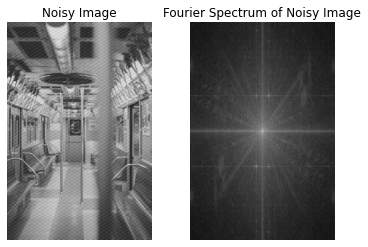

In [132]:
# Get dimension
w, l = helper.paddedsize(img_train.shape[0],img_train.shape[1])

# Calculate DFT
F = fp.fft2(util.img_as_float(img_train),(w,l))

# Scaling & Shifting for fourier spectrum display
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))

# Show image
plt.subplot(1,2,1); plt.imshow(img_train, cmap='gray')
plt.title('Noisy Image'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image');
plt.axis("off")
plt.show()

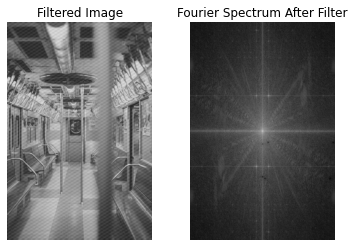

In [133]:
# Apply notch filter
# notch function is provided in helper.py
H1 = helper.notch('btw', w, l, 10, 50, 100)
H2 = helper.notch('btw', w, l, 10, 1, 400)
H3 = helper.notch('btw', w, l, 10, 620, 100)
H4 = helper.notch('btw', w, l, 10, 22, 414)
H5 = helper.notch('btw', w, l, 10, 592, 414)
H6 = helper.notch('btw', w, l, 10, 1, 114)

# Apply notch filter
FS_train = F*H1*H2*H3*H4*H5*H6
# Calculate IDFT for spatial domain transformation
F_train = fp.ifft2(FS_train).real
F_train = F_train[:img_train.shape[0],:img_train.shape[1]]

# Scaling & Shifting for fourier spectrum display
Fcf = fp.fftshift(FS_train)
S2 = np.log(1+abs(Fcf))
# Show image
plt.subplot(1,2,1); plt.imshow(F_train, cmap='gray')
plt.title('Filtered Image')
plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter')
plt.axis("off")
plt.show()

c. [20] Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

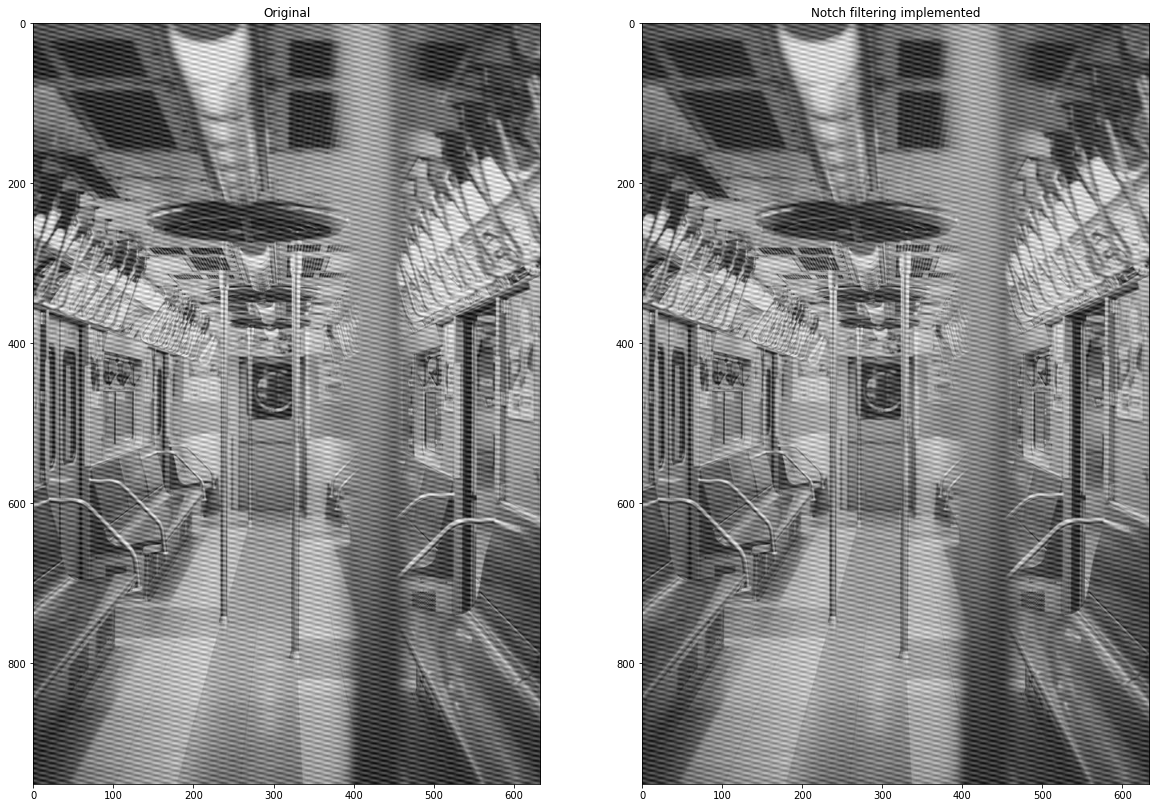

In [135]:
# Show image
plt.figure(figsize=(20,20))
plt.subplot(1,2,1); plt.imshow(img_train, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2); plt.imshow(F_train, cmap='gray')
plt.title("Notch filtering implemented")
plt.show()

Secara kasat mata, tampak bahwa tidak terlalu terlihat perbedaan yang signifikan pada gambar setelah diberikan notch filtering.